In [228]:
import pandas as pd
data=pd.read_csv("hcvdat0.csv")
data=data.drop(columns=['Unnamed: 0'])
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [229]:
from sklearn.impute import SimpleImputer
import numpy as np

numerical_cols = data.select_dtypes(include=[np.number]).columns
imputer_mean = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer_mean.fit_transform(data[numerical_cols])

categorical_cols = data.select_dtypes(include=[object]).columns
imputer_mode = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_mode.fit_transform(data[categorical_cols])
data


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32.0,m,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32.0,m,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32.0,m,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32.0,m,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32.0,m,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62.0,f,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64.0,f,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64.0,f,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46.0,f,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [230]:
data['Class'] = data['Category'].str.extract('(\d+)').astype(int)
data['ClassName'] = data['Category'].str.extract('=(.*)')

class_mapping = {
    'Blood Donor': 0,
    'suspect Blood Donor': 1,
    'Hepatitis': 2,
    'Fibrosis': 3,
    'Cirrhosis': 4
}
data['Class'] = data['ClassName'].map(class_mapping).astype(int)

data = data.drop(columns=['Category'])
data['Sex'] = data['Sex'].map({'m': 0, 'f': 1})

In [231]:
data.columns

Index(['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA',
       'GGT', 'PROT', 'Class', 'ClassName'],
      dtype='object')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

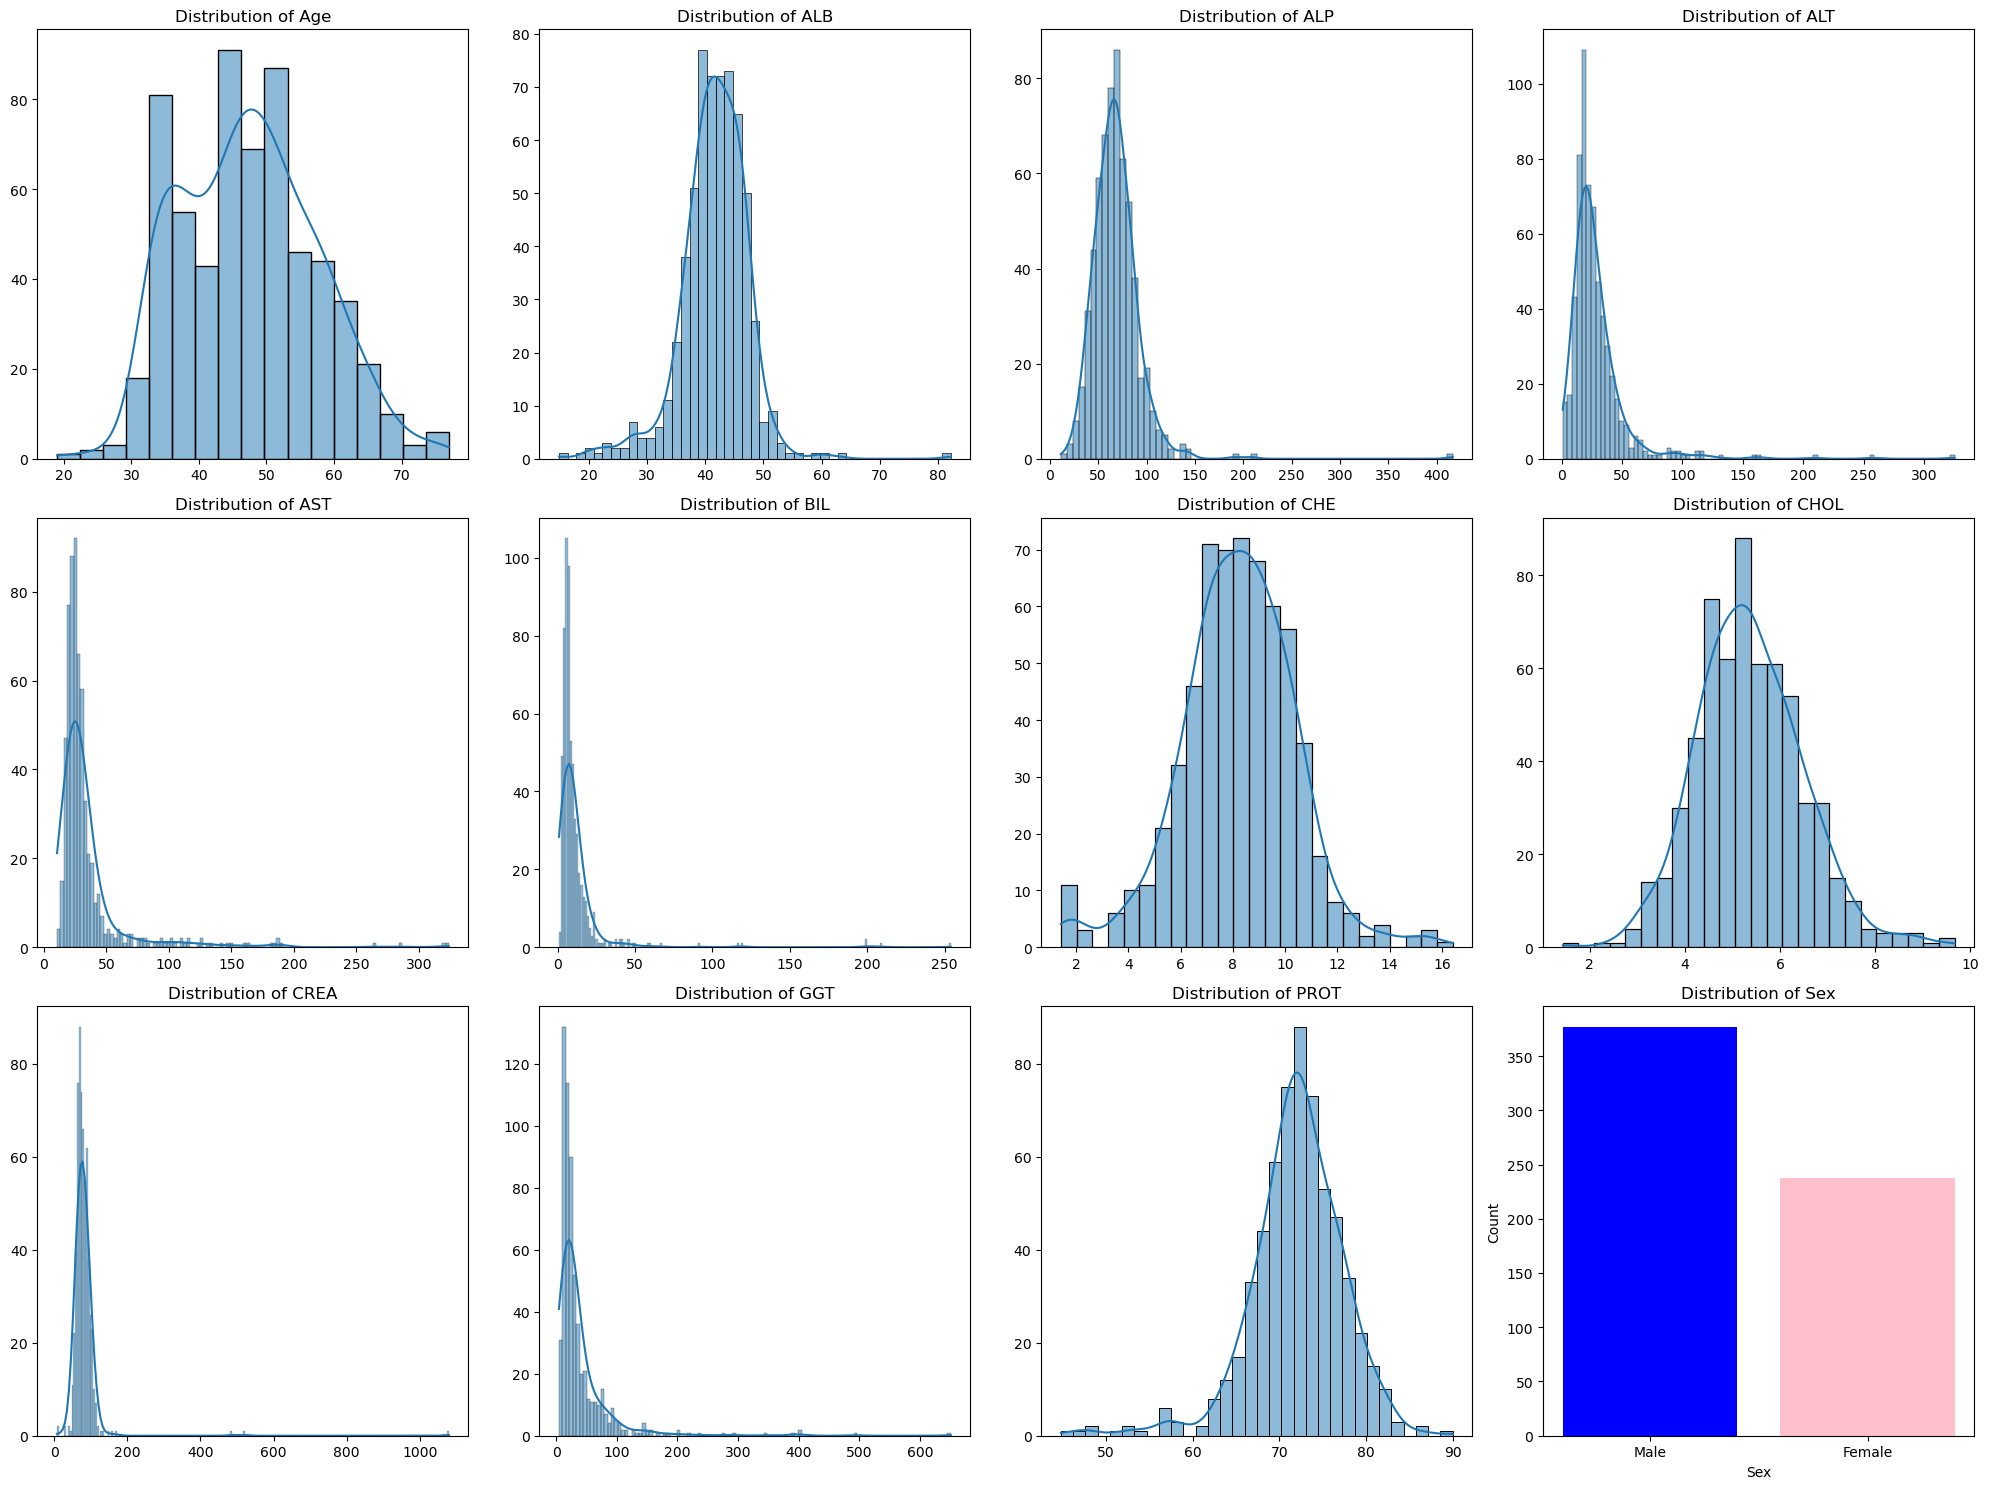

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

axs = axs.flatten()
numerical_features = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
axs[-1].bar(data['Sex'].value_counts().index, data['Sex'].value_counts().values, color=['blue', 'pink'])
axs[-1].set_title('Distribution of Sex')
axs[-1].set_xlabel('Sex')
axs[-1].set_ylabel('Count')
axs[-1].set_xticks([0, 1])
axs[-1].set_xticklabels(['Male', 'Female'])

# Adjust layout
plt.tight_layout()
plt.show()

In [233]:
X = data.drop(columns=['Class', 'ClassName'])
y = data['Class']
class_names = data['ClassName'].unique()
data['Class'].unique()

array([0, 1, 2, 3, 4])

In [234]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [236]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [237]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,245 (40.02 KB)

 Trainable params: 10,245 (40.02 KB)

 Non-trainable params: 0 (0.00 B)

In [238]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [239]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6215 - loss: 1.3775 - val_accuracy: 0.8270 - val_loss: 0.9896
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8748 - loss: 0.8059 - val_accuracy: 0.8378 - val_loss: 0.7282
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9073 - loss: 0.4726 - val_accuracy: 0.8432 - val_loss: 0.6215
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9076 - loss: 0.3655 - val_accuracy: 0.8432 - val_loss: 0.5479
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9341 - loss: 0.2962 - val_accuracy: 0.8486 - val_loss: 0.4862
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9477 - loss: 0.2200 - val_accuracy: 0.8595 - val_loss: 0.4481
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9504 - loss: 0.2056 - val_accuracy: 0.8595 - val_loss: 0.4362
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9401 - loss: 0.2206 - val_accuracy: 0.8649 - val_loss:

In [240]:
loss,accuracy=model.evaluate(X_test,y_test)
print(f"Loss:{loss}")
print(f"Accuracy:{accuracy}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.9011 - loss: 0.6539
Loss:0.5051830410957336
Accuracy:0.9027026891708374


In [241]:
def predict_class(input_data):
    input_data = scaler.transform([input_data])
    prediction = model.predict(input_data)
    class_index = np.argmax(prediction)
    return class_names[class_index]

In [242]:
user_input = [64, 1, 29, 87.3, 3.5, 99, 48, 1.66, 3.63, 66.7, 64.2, 82]
predicted_class = predict_class(user_input)
print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Cirrhosis


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [243]:
from tensorflow.keras.models import save_model

model.save('liver_disease_model.h5')

print("Model saved to 'liver_disease_model.h5'")

Model saved to 'liver_disease_model.h5'


In [253]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)


# Classification Report
class_report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(class_report)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy: 0.9027027027027027
Confusion Matrix:
[[152   1   0   0   0]
 [  1   2   0   0   0]
 [  3   0   6   1   0]
 [  6   0   0   2   0]
 [  4   0   0   2   5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       153
           1       0.67      0.67      0.67         3
           2       1.00      0.60      0.75        10
           3       0.40      0.25      0.31         8
           4       1.00      0.45      0.62        11

    accuracy                           0.90       185
   macro avg       0.80      0.59      0.66       185
weighted avg       0.90      0.90      0.89       185



In [250]:
def predict_class(input_data):
    input_data = scaler.transform([input_data])
    prediction = model.predict(input_data)
    class_index = np.argmax(prediction)
    return class_names[class_index]
st.title("Liver Disease Classification")

st.write("Enter the input features for classification:")

inputs = []
for feature in X.columns:
    value = st.number_input(f"Enter value for {feature}:")
    inputs.append(value)

if st.button("Predict"):
    predicted_class = predict_class(inputs)
    st.write(f"The predicted class is: {predicted_class}")


In [251]:
!streamlit run hcv.ipynb

Traceback (most recent call last):
  File "/opt/anaconda3/bin/streamlit", line 7, in <module>
    from streamlit.cli import main
ModuleNotFoundError: No module named 'streamlit.cli'


In [252]:
!pip install streamlit